# Manejo de datos faltantes en ciencia de datos


## 1. Introducción
En ciencia de datos, el manejo de datos faltantes es uno de los retos más comunes al trabajar con información real. Los datos incompletos pueden aparecer por errores de captura, problemas de almacenamiento o porque simplemente ciertos valores no existen. Ignorar estos valores puede llevar a análisis erróneos, modelos poco confiables o incluso fallos en los algoritmos. Por eso, es fundamental aprender a identificar, visualizar y tratar los datos faltantes de manera adecuada.

## ¿Qué es un dato faltante? (`None`, `np.nan`, `pd.NA`)
En Python existen varias formas de representar datos faltantes o valores nulos. Las más comunes son:

- `None`: Objeto nulo de Python, indica ausencia de valor.
- `np.nan`: Valor especial de tipo flotante proporcionado por NumPy, representa "Not a Number".
- `pd.NA`: Introducido en versiones recientes de pandas, es una forma general de representar datos faltantes para distintos tipos de datos.

### Ejemplo resuelto: Operaciones con valores faltantes

In [ ]:
import numpy as np
import pandas as pd
# None
print(
    None or True,     # True
    None or False,    # False
    None == None,     # True
    None is None,     # True
    type(None),       # <class 'NoneType'>
    sep="\n"
)
# np.nan
print(
    np.nan or True,         # True
    np.nan or False,        # nan
    np.nan == np.nan,       # False
    np.nan is np.nan,       # True
    np.nan / 2,             # nan
    np.nan * 7,             # nan
    type(np.nan),           # <class 'float'>
    np.isnan(np.nan),       # True
    sep="\n"
)

True
False
True
True
<class 'NoneType'>
nan
nan
False
True
nan
nan
<class 'float'>
True


**Explicación:**
- `None` se comporta como un valor nulo en Python puro.
- `np.nan` es especial para cálculos numéricos y se propaga en operaciones matemáticas.
- Comparar `np.nan` consigo mismo siempre devuelve `False`.
- Para verificar si un valor es `np.nan` se debe usar `np.isnan()`.

## Identificación de datos faltantes en DataFrames
Las funciones principales para identificar valores faltantes en pandas son `isna()` y `isnull()`. Ambas hacen exactamente lo mismo.

### Ejemplo


In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'A': [1, np.nan, 3, None, 5],
    'B': [np.nan, 2, None, 4, pd.NA]
})

print("DataFrame original:")
print(df)

print("\n¿Dónde hay datos faltantes?")
print(df.isna())

print("\n¿Hay diferencia usando isnull?")
print(df.isnull())

DataFrame original:
     A     B
0  1.0   NaN
1  NaN     2
2  3.0  None
3  NaN     4
4  5.0  <NA>

¿Dónde hay datos faltantes?
       A      B
0  False   True
1   True  False
2  False   True
3   True  False
4  False   True

¿Hay diferencia usando isnull?
       A      B
0  False   True
1   True  False
2  False   True
3   True  False
4  False   True


**Explicación:**
- `isna()` y `isnull()` devuelven un DataFrame booleano indicando la presencia de datos faltantes.

## Conteo y resumen de datos faltantes
Es importante no solo identificar, sino cuantificar los datos faltantes. Podemos usar `.sum()`, `.mean()` y `.info()` para esto.

### Ejemplo resuelto

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'A': [1, np.nan, 3, None, 5],
    'B': [np.nan, 2, None, 4, pd.NA]
})

print("Conteo de datos faltantes por columna:")
print(df.isna().sum())

print("\nPorcentaje de datos faltantes por columna:")
print(df.isna().mean() * 100)

print("\nResumen general del DataFrame:")
print(df.info())

Conteo de datos faltantes por columna:
A    2
B    3
dtype: int64

Porcentaje de datos faltantes por columna:
A    40.0
B    60.0
dtype: float64

Resumen general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      float64
 1   B       2 non-null      object 
dtypes: float64(1), object(1)
memory usage: 212.0+ bytes
None


**duplicated()** devuelve una serie booleana para identificar duplicados.

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False


**Explicación:**
- `.sum()` suma los valores `True` (equivalente a contar los nulos).
- `.mean()` da el porcentaje de valores faltantes.
- `.info()` muestra cuántos valores no nulos hay en cada columna.

## Visualización de datos faltantes
Visualizar los datos faltantes es muy útil para detectar patrones. Una de las librerías más usadas es `missingno`.

### Ejemplo

<Axes: >

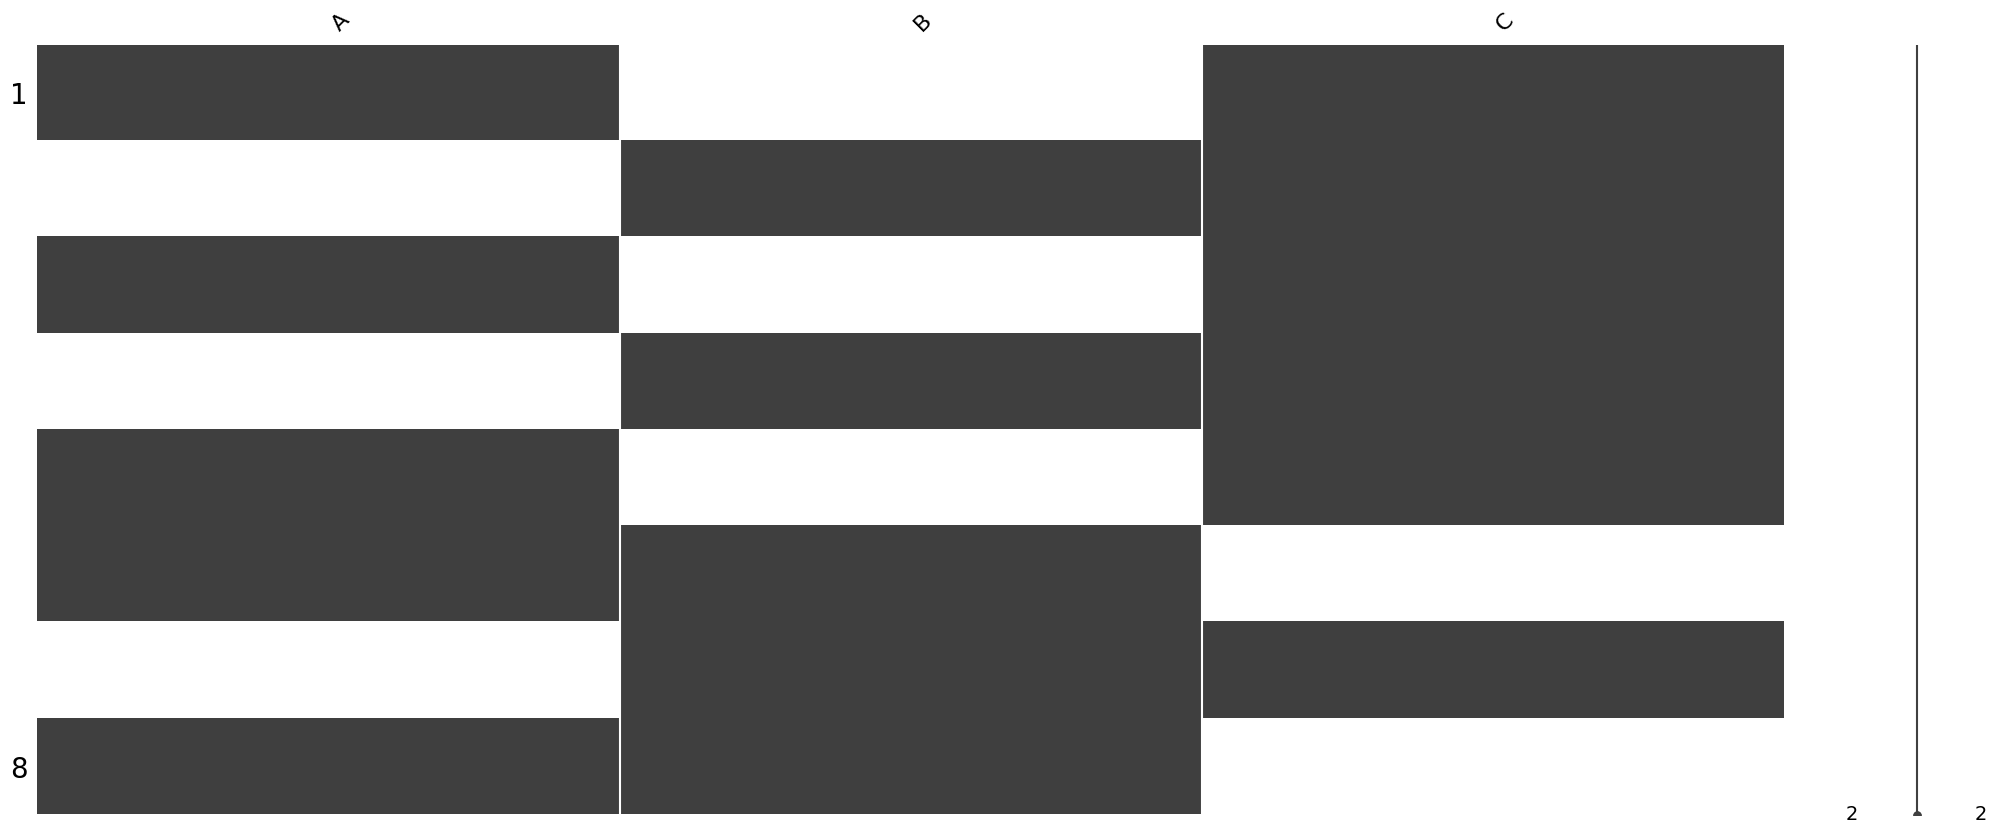

In [ ]:
import missingno as msno
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'A': [1, np.nan, 3, None, 5, 6, np.nan, 8],
    'B': [np.nan, 2, None, 4, pd.NA, 6, 7, 8],
    'C': [1, 2, 3, 4, 5, None, 7, np.nan]
})

msno.matrix(df)

**Explicación:**
- `msno.matrix(df)` muestra un gráfico donde las líneas blancas indican valores faltantes en el DataFrame.

## Estrategias para el manejo de datos faltantes
Las estrategias principales son:
- **Eliminación de filas o columnas:** cuando hay muchos datos faltantes y no es crítico perder esa información.
- **Imputación:** reemplazar los valores faltantes por la media, mediana, moda u otros valores.

### Ejemplo resuelto: Eliminación de datos faltantes

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'A': [1, np.nan, 3, None, 5],
    'B': [np.nan, 2, None, 4, pd.NA]
})

print("Original:")
print(df)

print("\nElimina filas con algún dato faltante:")
print(df.dropna())

print("\nElimina columnas donde todos los valores son faltantes:")
print(df.dropna(axis=1, how='all'))

Original:
     A     B
0  1.0   NaN
1  NaN     2
2  3.0  None
3  NaN     4
4  5.0  <NA>

Elimina filas con algún dato faltante:
Empty DataFrame
Columns: [A, B]
Index: []

Elimina columnas donde todos los valores son faltantes:
     A     B
0  1.0   NaN
1  NaN     2
2  3.0  None
3  NaN     4
4  5.0  <NA>


### Ejemplo: Imputación de datos

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'A': [1, np.nan, 3, None, 5],
    'B': [np.nan, 2, None, 4, None],
    'C':[np.nan, 2, None, 4, None]
})

print(df)
print("Imputa valores faltantes con la media:")

print(df.fillna(df.mean(numeric_only=True)))

     A    B    C
0  1.0  NaN  NaN
1  NaN  2.0  2.0
2  3.0  NaN  NaN
3  NaN  4.0  4.0
4  5.0  NaN  NaN
Imputa valores faltantes con la media:
     A    B    C
0  1.0  3.0  3.0
1  3.0  2.0  2.0
2  3.0  3.0  3.0
3  3.0  4.0  4.0
4  5.0  3.0  3.0


## Advertencias comunes y buenas prácticas
Trabajar con datos faltantes puede provocar errores sutiles o resultados inesperados. Ten en cuenta:
- El uso de `==` para comparar `np.nan` nunca es True, siempre usa `np.isnan()` o `.isna()`.
- Imputar valores puede introducir sesgos si no se justifica.
- Algunas funciones de pandas y sklearn no funcionan con datos faltantes, otras sí.

### Ejemplo resuelto: Comparación de np.nan

In [ ]:
import numpy as np

a = np.nan
b = np.nan

print("¿a == b?", a == b)
print("np.isnan(a):", np.isnan(a))
print("np.isnan(b):", np.isnan(b))

¿a == b? False
np.isnan(a): True
np.isnan(b): True


### Ejemplo: Operaciones con datos faltantes

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'A': [1, np.nan, 3, 4]})
print("Suma ignorando NaN:", df['A'].sum())
print("Promedio ignorando NaN:", df['A'].mean())
print("Cuenta total:", df['A'].count())

Suma ignorando NaN: 8.0
Promedio ignorando NaN: 2.6666666666666665
Cuenta total: 3


## Caso práctico con un conjunto de datos real
Vamos a cargar un conjunto de datos real (por ejemplo, algún dataset de Kaggle o de sklearn) y analizar el manejo de datos faltantes.

### Ejemplo: Dataset Titanic de seaborn

In [ ]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')
print(df.head())
print(df.isna().sum())



   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck      

## Vamos a extender el uso de una librería especifica para datos faltante

### MissingMethods

In [ ]:
!pip install upsetplot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=upsetplot-0.9.0-py3-none-any.whl size=24866 sha256=77130a1d8134c08f228f8dcf461ce4cbb4888fc191eaabd2b79b3a871b0ecb83
  Stored in directory: /root/.cache/pip/wheels/7b/ce/88/1d0bce5b2680165c29c3e68416325e79674d5a9f422d037996
Successfully built upsetplot


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


La extensión **missing_extension** amplía pandas para un análisis más profundo de los datos faltantes, proporcionando tablas, resúmenes y visualizaciones rápidas.

In [ ]:
from missing_extension import MissingMethods

## Resumen de Datos faltantes
La función missing_variable_table muestra el número de valores faltantes agrupados por variable

In [ ]:
df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,11,73.333333
1,2,2,13.333333
2,177,1,6.666667
3,688,1,6.666667


In [ ]:
# numero total de valores completos
df.missing.number_complete()

np.int64(12496)

In [ ]:
#Numero total de valores faltantes
df.missing.number_missing()

np.int64(869)

### Ejercicio para el estudiante
Elige una columna con datos faltantes y aplica al menos dos estrategias diferentes de manejo (eliminación e imputación), luego analiza el impacto en el DataFrame.

In [ ]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')

# tu código aquí

#Resumenes tabulares de valores faltantes

Variables = Columnas
Resumen por variable

In [ ]:
df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,survived,0,891,0.000000
1,pclass,0,891,0.000000
2,sex,0,891,0.000000
3,age,177,891,19.865320
4,sibsp,0,891,0.000000
5,parch,0,891,0.000000
6,fare,0,891,0.000000
7,embarked,2,891,0.224467
8,class,0,891,0.000000
9,who,0,891,0.000000


### Resumenes por caso

Permite evaluar el numero de valores faltantes por fila.


In [ ]:
df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,1,5.882353
1,1,0,0.000000
2,2,1,5.882353
3,3,0,0.000000
4,4,1,5.882353
...,...,...,...
886,886,1,5.882353
887,887,0,0.000000
888,888,2,11.764706
889,889,0,0.000000


### Intervalos de valores Faltantes
Podemos trabajar datos faltantes por bloques span me indica un intervalo que identifica en xbloque cuantos valores faltante y copletos tenemos


In [ ]:
(
    df
    .missing
    .missing_variable_span(
        variable="age",
        span_every=20
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,3,17,15.000000,85.000000
1,1,6,14,30.000000,70.000000
2,2,6,14,30.000000,70.000000
3,3,4,16,20.000000,80.000000
4,4,3,17,15.000000,85.000000
5,5,3,17,15.000000,85.000000
6,6,3,17,15.000000,85.000000
7,7,4,16,20.000000,80.000000
8,8,3,17,15.000000,85.000000
9,9,6,14,30.000000,70.000000


### Racha de valores faltantes o Run length de valores faltantes

In [ ]:
(
    df
    .missing
    .missing_variable_run(
        variable="age"
    )
)

,run_length,is_na
0,5,complete
1,1,missing
2,11,complete
3,1,missing
4,1,complete
...,...,...
298,9,complete
299,1,missing
300,9,complete
301,1,missing


# Visualización inicial de valores faltantes

Por Variable

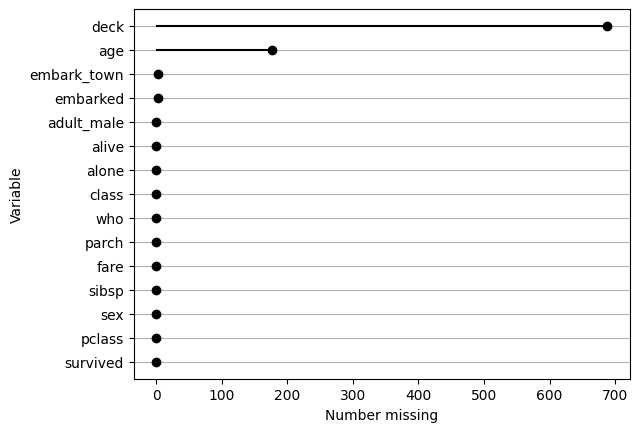

In [ ]:
df.missing.missing_variable_plot()

## Visualizaciones de data faltante por fila

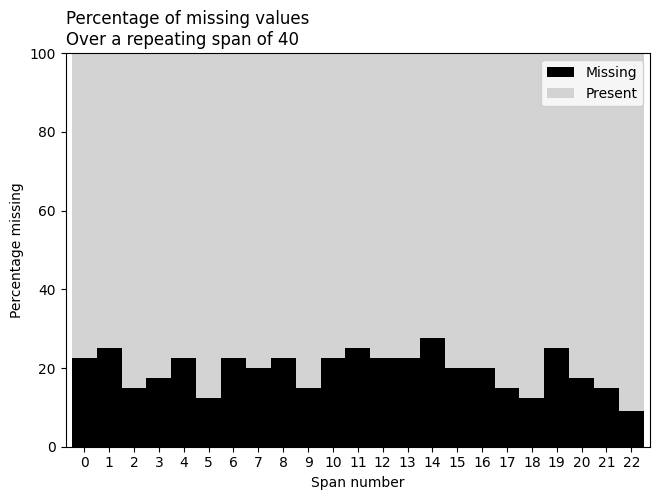

In [ ]:
(
    df
    .missing
    .missing_variable_span_plot(
        variable="age",
        span_every=40,
        rot=0
    )
)

<Axes: >

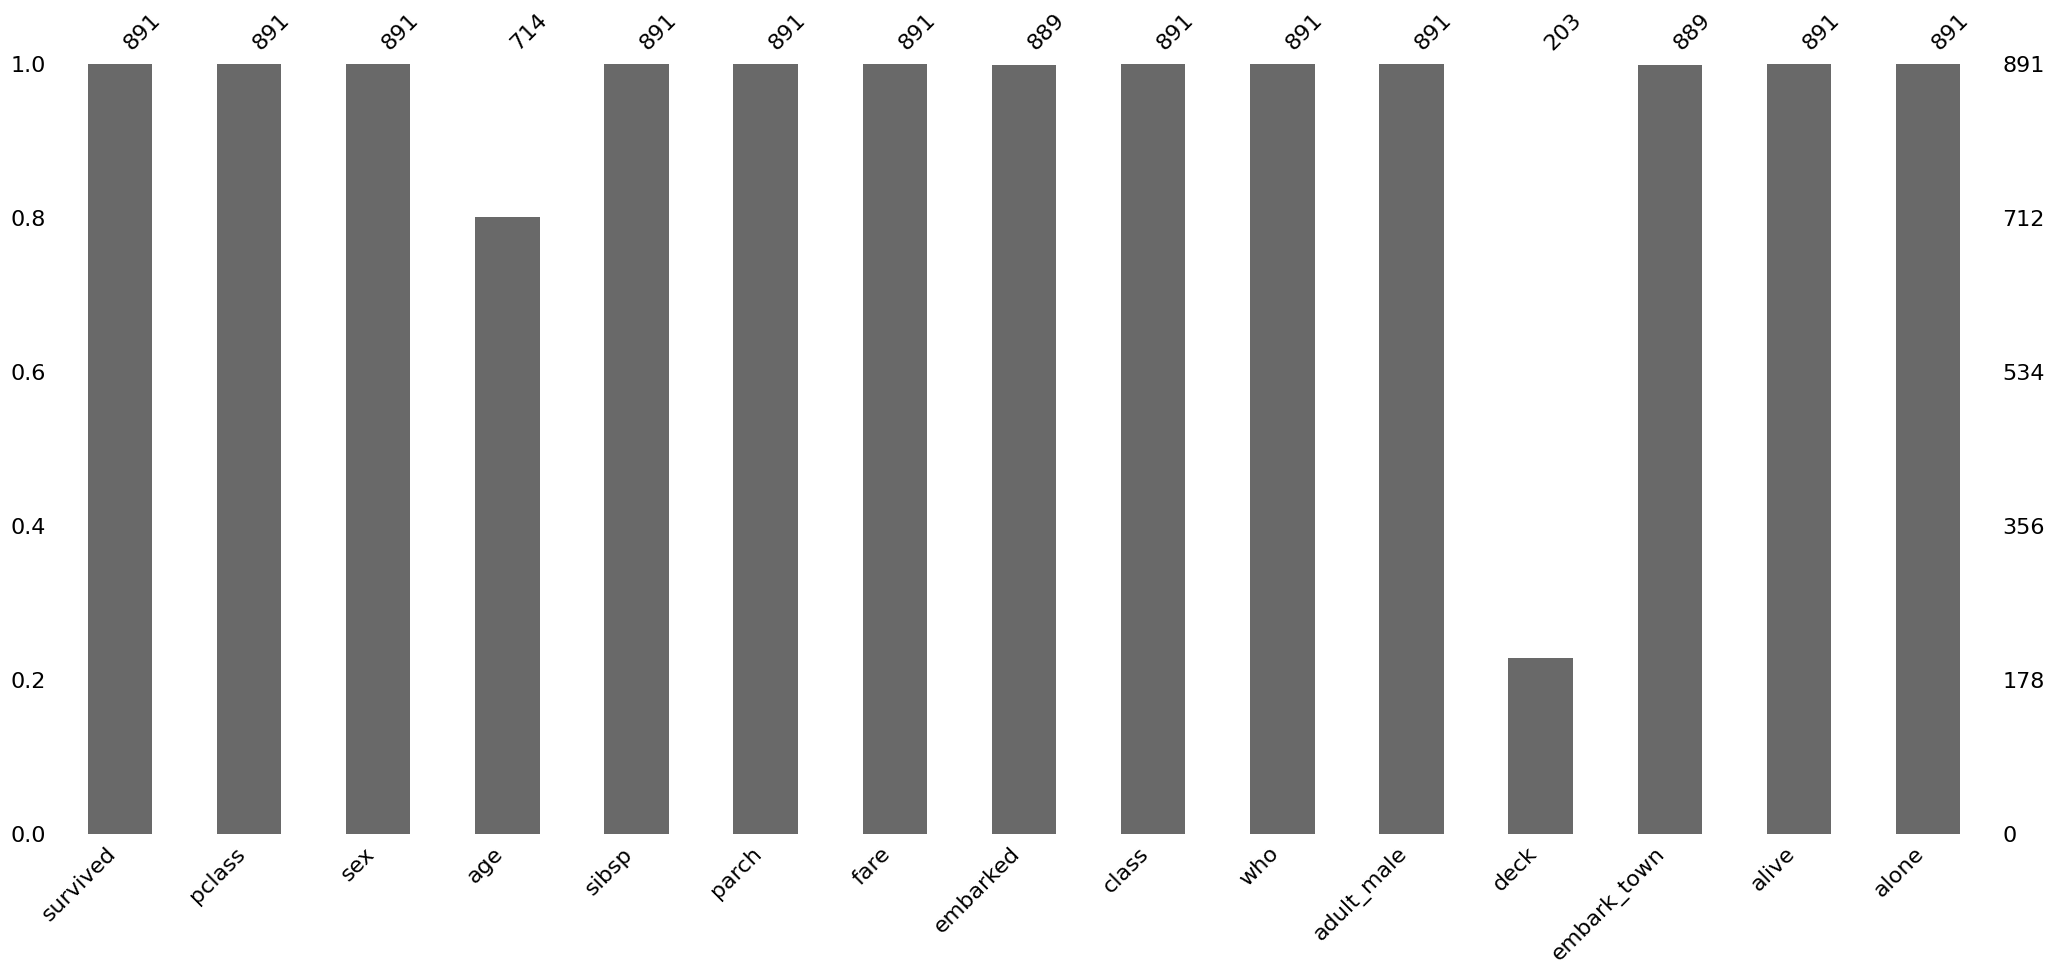

In [ ]:
import missingno
missingno.bar(df = df)

## Visualización de data faltante por fila y columna

<Axes: >

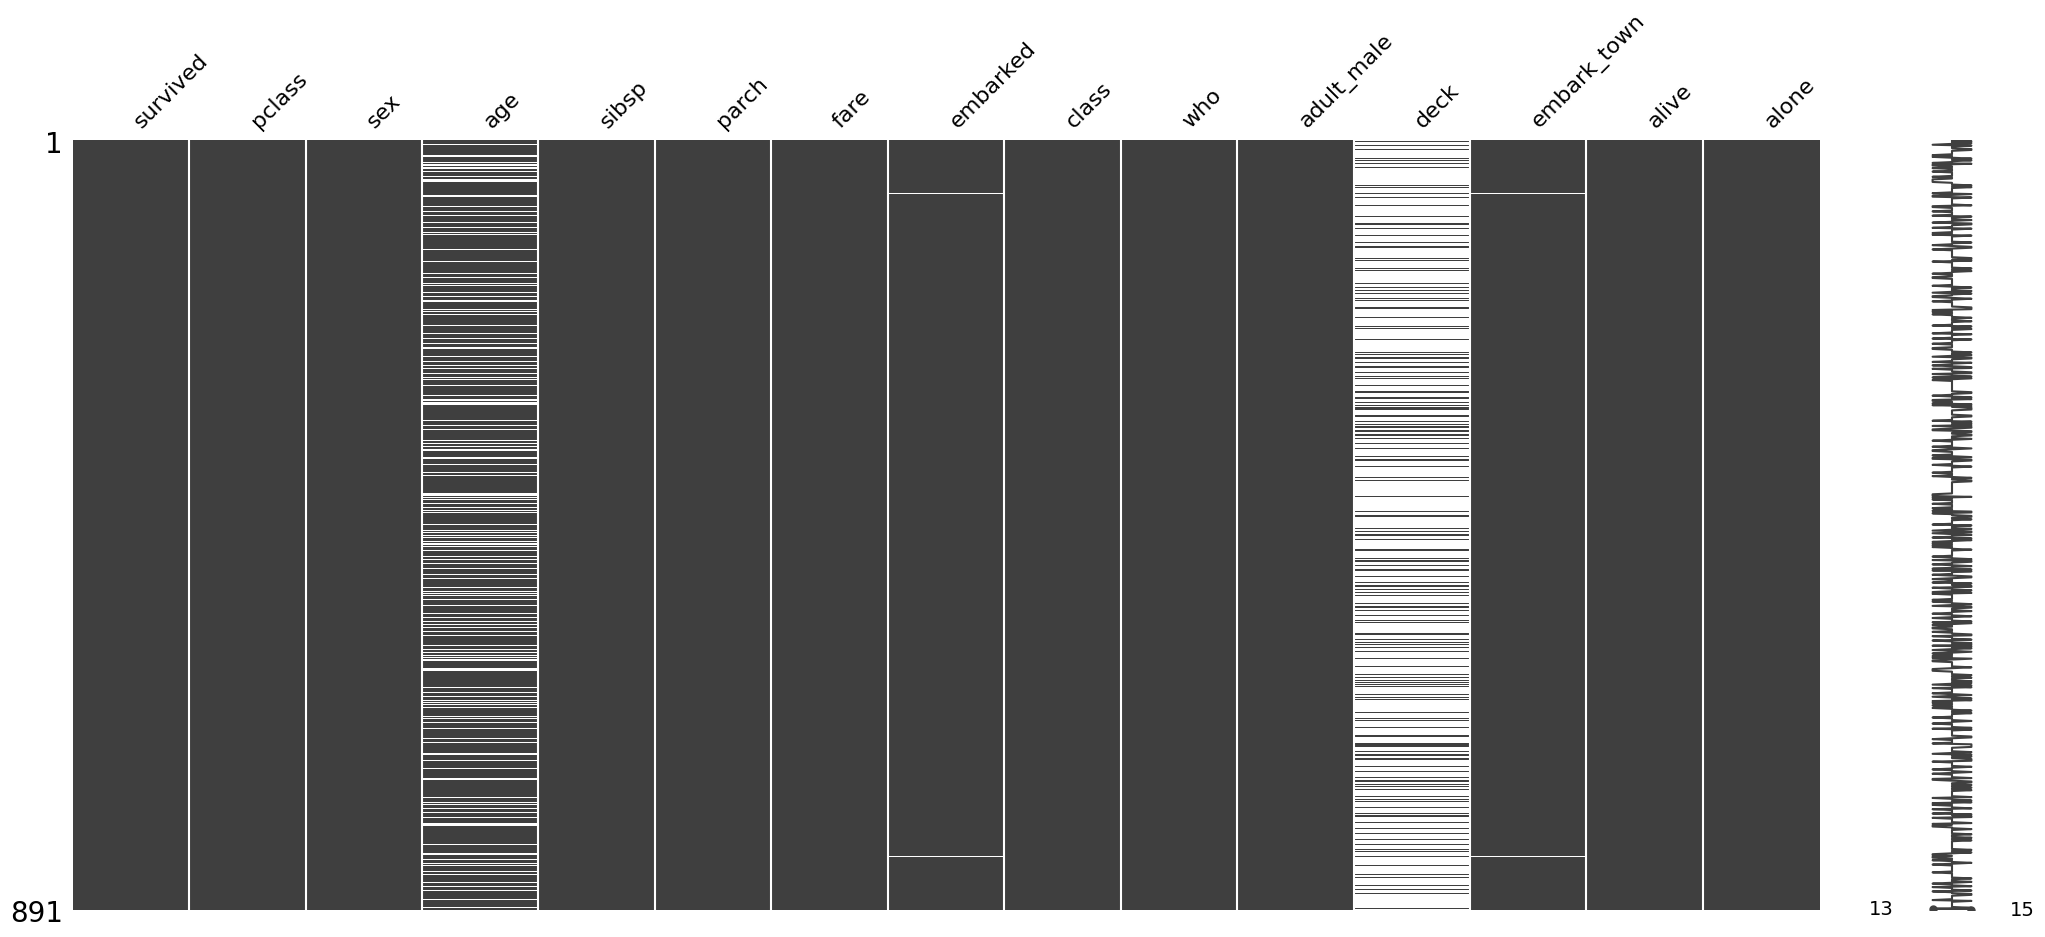

In [ ]:
missingno.matrix(df=df)

## upsetplot()
Premite evaluar que variables comparten valores faltantes, muestra la cantidad de valores faltantes y hace una comparación al final entre cada una

/usr/local/lib/python3.11/dist-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/usr/local/lib/python3.11/dist-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

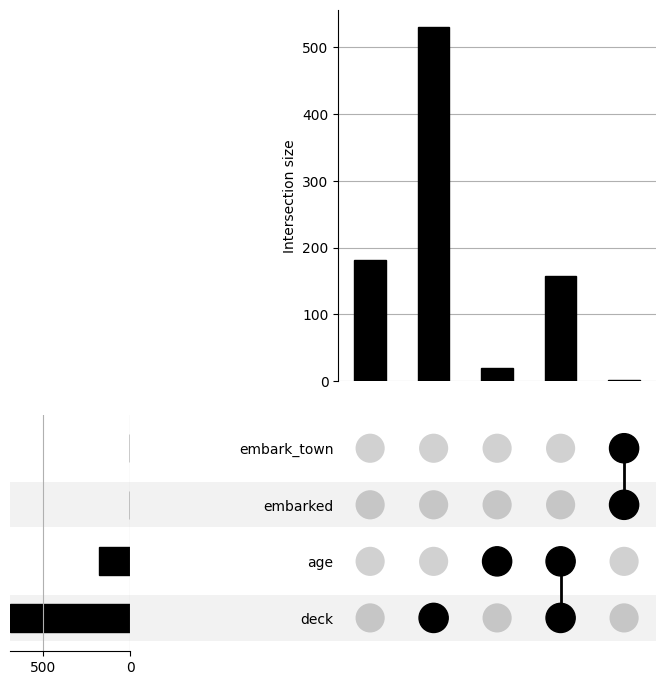

In [ ]:
(
    df
    .missing
    .missing_upsetplot(
        #variables=None
        variables = ['age','embarked','embark_town', 'deck'],
        element_size = 60
    )
)

#Codificación de valores faltantes


🚧 Advertencia

  Al igual que cada persona es una nueva puerta a un mundo diferente, los valores faltantes existen en diferentes formas y colores. Al trabajar con valores faltantes será crítico entender sus distintas representaciones. A pesar de que el conjunto de datos de trabajo pareciera que no contiene valores faltantes, deberás ser capaz de ir más allá de lo observado a simple vista para remover el manto tras el cual se esconde lo desconocido.


## Valores comúnmente asociados a valores faltantes en cadenas de texto

In [ ]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

## Valores comúnmente asociados a valores faltantes en numeros

In [ ]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

#¿Cómo encontrar los valores comúnmente asociados a valores faltantes?

In [ ]:
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)
missing_data_example_df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


In [ ]:
missing_data_example_df.missing.number_missing()

np.int64(0)

### Revisar Valores únicos del DataFrame

De esta forma se puede ver cuales son nuestros valores unicos y evaluar valores que son faltantes realmente.

- En la primeralinea por columan
- En la segunda de todo del set de datos

In [ ]:
missing_data_example_df.x.unique()

array([1, 3, 'NA', -99, -98], dtype=object)

In [ ]:
#Permite evaluar las columnas de tipo objetc y obtener sus valores únicos

(
    missing_data_example_df
    .select_dtypes(object)
    .apply(pd.unique)
)

,0
x,"[1, 3, NA, -99, -98]"
y,"[A, N/A, NA, E, F, G]"


#Sustituyendo valores comúnmente asociados a valores faltantes

**Sustitución Global**

Implica que realizas la sustitucion posterior al análisis o iteración de los datos

In [ ]:
(
    missing_data_example_df
    .replace(
        to_replace=[-99,'NA'],
        value=np.nan
    )
)

/tmp/ipython-input-884111965.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(


,x,y,z
0,1.0,A,-100.0
1,3.0,N/A,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,-1.0
5,NaN,G,-1.0


**Sustitución Dirigida**

Nos permite agregar ciertas reglas de sustitución para una columan en específico

### 9.1. Resumen de variables con datos faltantes: `missing_variable_summary()`

In [ ]:
(
    missing_data_example_df
    .replace(
        to_replace={
            "x": {
                -99: np.nan
            },
           "z": {
                -99: np.nan
            }
        }
    )
)

,x,y,z
0,1,A,-100.0
1,3,N/A,NaN
2,NA,NA,-98.0
3,NaN,E,-101.0
4,-98,F,-1.0
5,NaN,G,-1.0


In [ ]:
completas = df.missing.number_complete()
print(f"Filas completas (sin ningún dato faltante): {completas}")

#Concepto y aplicación de la matriz de sombras (shadow matrix)

La **matriz de sombras** (o **shadow matrix**) es un concepto utilizado en el análisis de datos y estadísticas para representar la presencia o ausencia de datos en un conjunto de datos. Este tipo de matriz ayuda a visualizar y analizar los patrones de datos faltantes, facilitando el entendimiento de cómo y por qué los datos faltan.

### Concepto de Matriz de Sombras

La matriz de sombras es una representación binaria del conjunto de datos original donde:

- **1** (o cualquier valor positivo) indica la presencia de un valor en esa posición del conjunto de datos original.

- **0** (o cualquier valor negativo) indica la ausencia de un valor en esa posición.

### Uso y Beneficios

1. **Visualización de Datos Faltantes**:

- La matriz de sombras facilita la visualización de patrones en los datos faltantes. Puedes ver claramente qué filas o columnas tienen más datos faltantes y si hay patrones específicos.

2. **Análisis de Patrones de Datos Faltantes**:

- Ayuda a identificar si los datos faltantes están distribuidos aleatoriamente o si siguen algún patrón específico.

3. **Preprocesamiento**:

- La matriz de sombras se utiliza en técnicas de imputación para entender cómo los datos faltantes están relacionados con otras variables y para mejorar los métodos de imputación.

##Construcción de la matriz de sombras

In [ ]:
(
    df
    #Genero una matriz de booleanos que me identifica con tru y false para que ,e puedan indicar cuales sno faltantes
    .isna()
    #Se remplaza para tener una matriz de datos con data más informativa
    .replace({
        False: "Not missing",
        True: "Missing"
    })
    # se debe tener nombres coordinados entre las variables originales y estas que se crean para ello se agrega el sufijo _NA
    .add_suffix("_NA")
    #concatenamos la matriz original con esta matriz de sommbras que acabamos de crear
    .pipe(
        lambda shadow_matrix: pd.concat(
            [df, shadow_matrix],
            axis="columns"
        )
    )
)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,parch_NA,fare_NA,embarked_NA,class_NA,who_NA,adult_male_NA,deck_NA,embark_town_NA,alive_NA,alone_NA
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,...,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing
887,1,1,female,19.0,0,0,30.0000,S,First,woman,...,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,...,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing
889,1,1,male,26.0,0,0,30.0000,C,First,man,...,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing


**Automatizando la generación de la matriz**

In [ ]:
(
    df
    .missing
    .bind_shadow_matrix(only_missing = True) # only_missing = True toma en cuenta unicamente las variables que tienen valores faltantes
)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_NA,embarked_NA,deck_NA,embark_town_NA
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Not Missing,Not Missing,Missing,Not Missing
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Not Missing,Not Missing,Not Missing,Not Missing
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Not Missing,Not Missing,Missing,Not Missing
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Not Missing,Not Missing,Not Missing,Not Missing
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Not Missing,Not Missing,Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,Not Missing,Not Missing,Missing,Not Missing
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,Not Missing,Not Missing,Not Missing,Not Missing
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,Missing,Not Missing,Missing,Not Missing
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,Not Missing,Not Missing,Not Missing,Not Missing


###  Visualización de valores faltantes
`missing_extension` puede hacer gráficos para visualizar los patrones de ausencia en variables y casos.



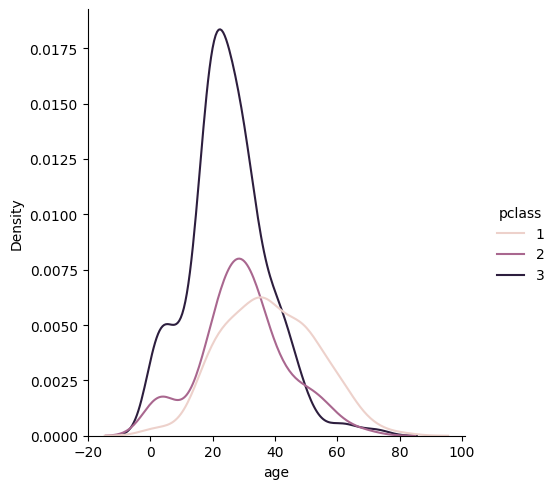

In [ ]:
(
    df
    .missing
    .bind_shadow_matrix(only_missing = True)
    .pipe(
        lambda df1:(
            sns.displot(
                data=df1,
                x="age",
                hue="pclass",
                kind="kde"
            )
        )
    )
)

<Axes: xlabel='pclass', ylabel='age'>

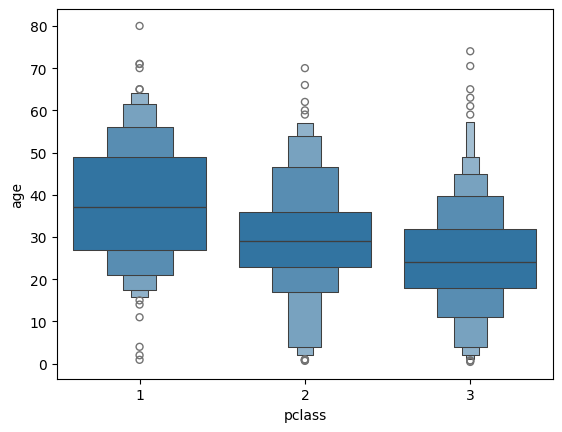

In [ ]:
(
    df
    .missing
    .bind_shadow_matrix(only_missing = True)
    .pipe(
        lambda df:(
            sns.boxenplot(
                data=df,
                x="pclass",
                y="age",
            )
        )
    )
)


## Correlación de Nulidad

**Existen valores faltantes que aparecen conjuntamente con otras variables en el conjunto de datos?**

La correlacion de nulidad nos ayuda a encontrar relaciones entre las variables en funcion de su nulidad

Los valores coloreados de color gris representan que no hay una correlacion ni positiva ni negativa entre las valores faltantes de las variables

Los valores coloreados de azul indican una correlacion positiva, es decir, la presencia de un valor faltante en una de las variables esta correlacionado con un valor faltante en la otra.

Los valores coloreados de rojo simboliza una correlacion negativa, es decir, mientras en una de las variables hay un valor faltante en la otro se tiene un valor completo y vicerversa.

Hay caso donde te puedes encontrar un simbolo de <1 lo que indica que estas cerca del 100% de correlacion bien sea negativa o positiva dependiendo del color


<Axes: >

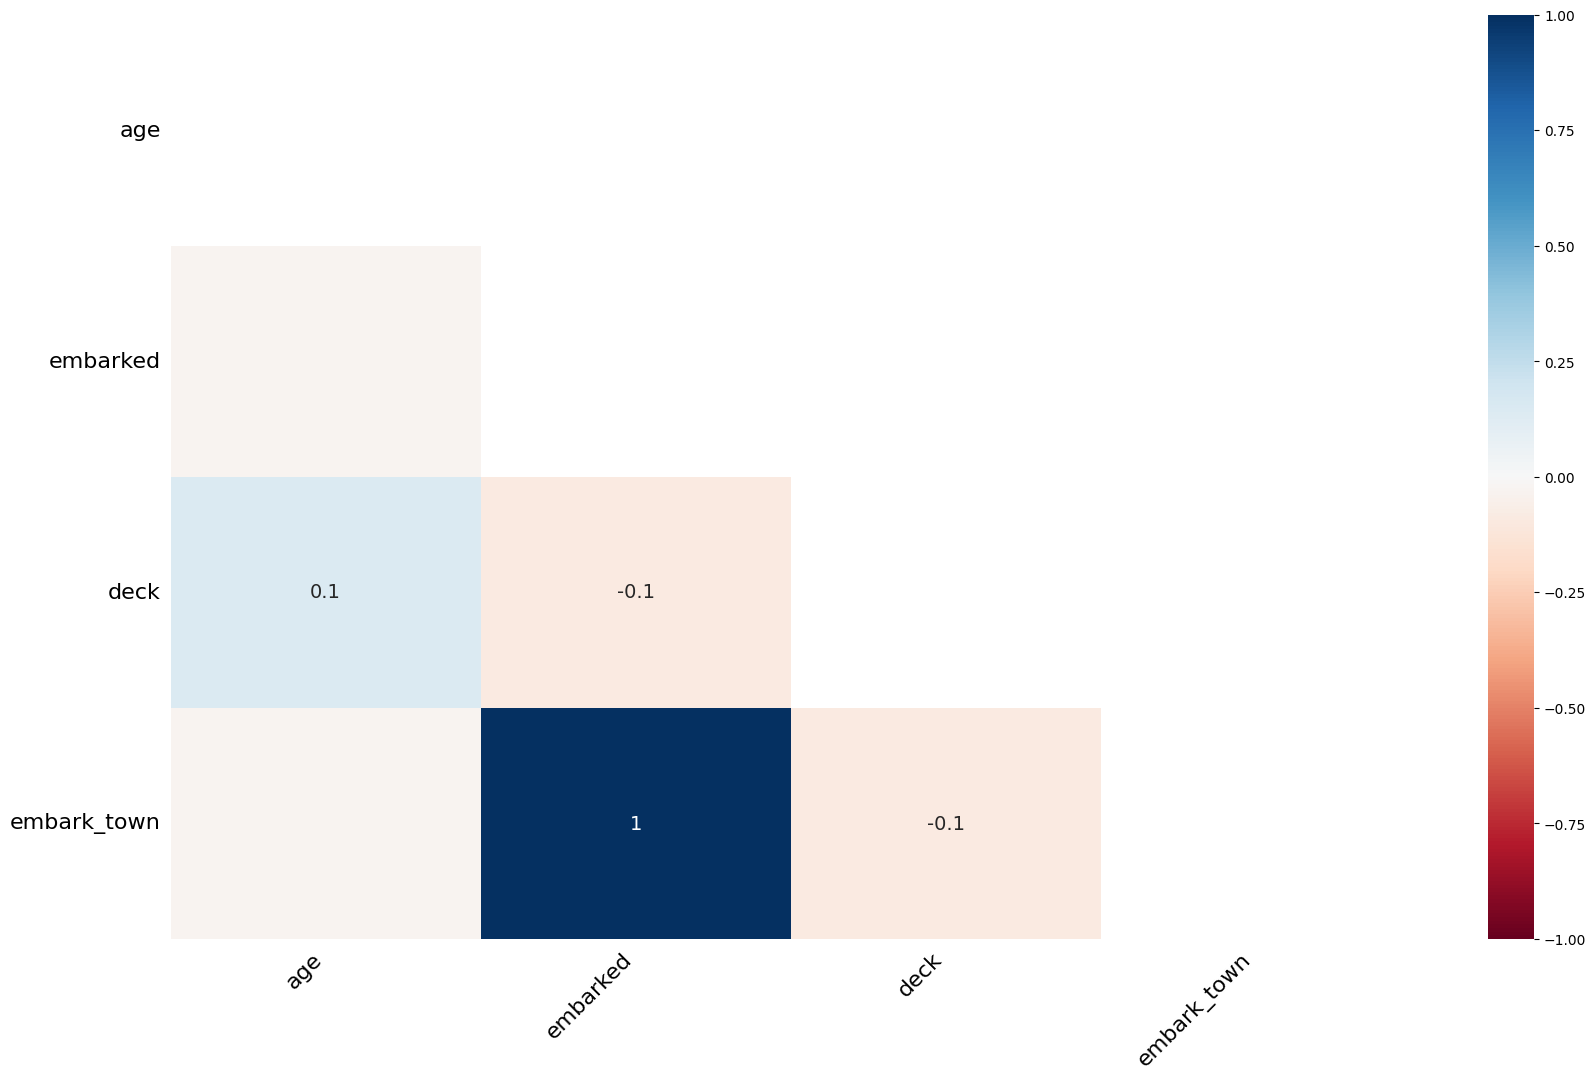

In [ ]:
missingno.heatmap(
    df=df
)

## Dendograma

El dendrograma muestra cómo se agrupan las variables según su patrón de datos faltantes. En otras palabras:

- Variables que están unidas más cercanamente (ramas cortas) tienden a tener valores faltantes en los mismos registros (filas).

- Variables más separadas tienen patrones distintos de valores ausentes.



<Axes: >

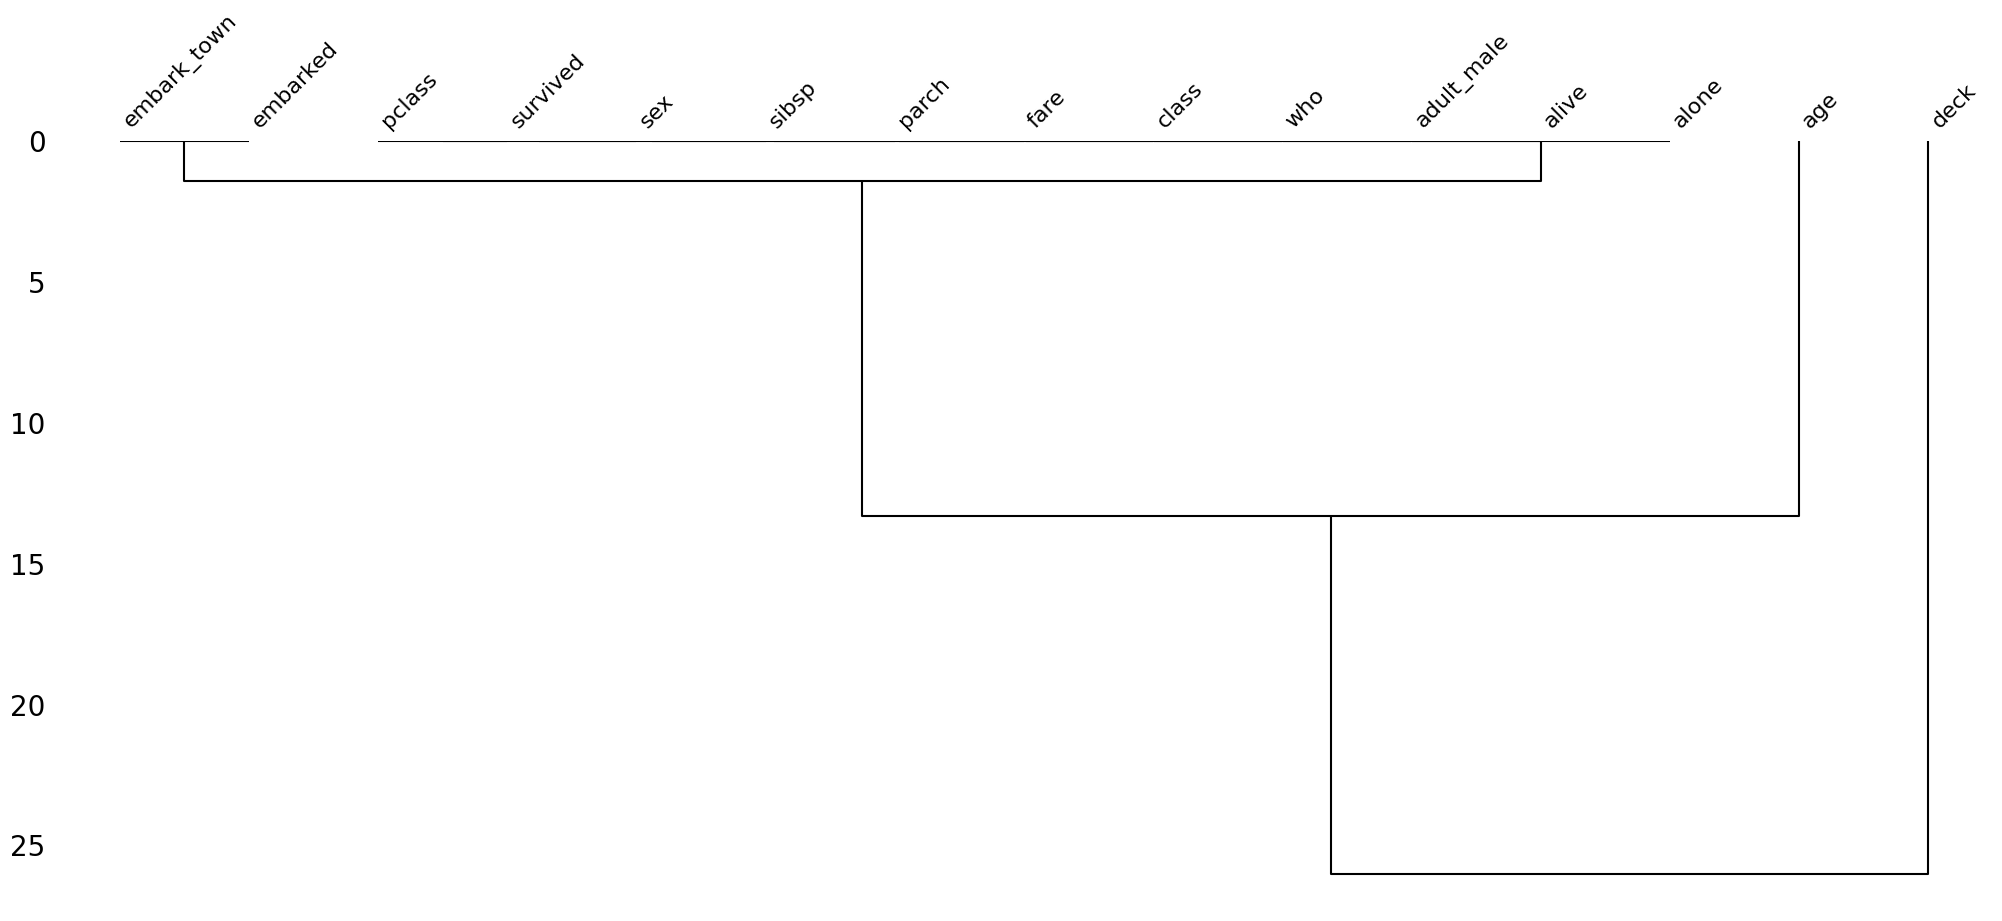

In [ ]:
missingno.dendrogram(
    df=df
)

## Conclusiones y recomendaciones
El manejo adecuado de datos faltantes es crucial para obtener análisis confiables y modelos predictivos robustos. Siempre debes:
- Analizar las causas de los datos faltantes
- Visualizar patrones de ausencia
- Justificar cualquier estrategia de imputación o eliminación
- Documentar las decisiones tomadas